In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pathlib import Path

In [69]:
def plot_model_performance(dataframe, y_column, x_column, title='', color='blue', directory=''):
    """
    Generate a bar chart comparing model performance metrics, with bold axis names, values above bars,
    and all text in Times New Roman font. Saves the plot as an image in the specified directory using pathlib.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    y_column (str): The column name for the values to be plotted on the Y-axis.
    x_column (str): The column name for the labels on the X-axis.
    title (str, optional): The title of the graph. Default is an empty string.
    color (str, optional): Color of the bars in the chart. Default is 'blue'.
    directory (str, optional): Directory path to save the plot image. Default is the current directory.

    Returns:
    None: Displays the bar chart and saves it as an image.
    """
    # Set font to Times New Roman for all text elements
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = 'Times New Roman'

    # Extract the necessary data from the DataFrame
    y_values = dataframe[y_column]
    x_labels = dataframe[x_column]

    # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_labels, y_values, color=color, alpha=0.7)
    plt.title(title, fontweight='bold')
    plt.xlabel(x_column, fontweight='bold')
    plt.ylabel(y_column, fontweight='bold')
    plt.xticks(rotation=45)
    
    # Add text labels above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

    # Create the directory if it does not exist and save the plot
    file_path = Path(directory) / f'ML_plot_{y_column}.png'
    plt.savefig(file_path)
    
    # Display the plot
    plt.show()
    
    plt.close()  # Close the plot to free up memory

    print(f'Plot saved to {file_path}')

In [70]:
ml_results_dir = "ml_results"
ml_plots_dir = "ml_plots"
ml_results_file = "ml_results_HT_no.csv"
path_data = Path(ml_results_dir) / ml_results_file
df_data = pd.read_csv(path_data, sep = ";")
df_data

,Model,accuracy,f1_score,auc,precision,recall,cv_accuracy,cv_f1,cv_auc,cv_precision,cv_recall
0,XGBoost,0.963085,0.961970,0.993906,0.983627,0.941246,0.965363,0.964787,0.993854,0.983101,0.947154
1,Random Forest,0.947154,0.946075,0.991511,0.957848,0.934587,0.946757,0.948435,0.991423,0.956915,0.940269
2,Decision Tree,0.952594,0.951414,0.952461,0.967598,0.935762,0.953413,0.954013,0.953389,0.964636,0.941336
3,Logistic Regression,0.881873,0.874380,0.945598,0.925230,0.828829,0.879475,0.874261,0.943895,0.915636,0.836516
4,Naive Bayes,0.727220,0.655545,0.725608,0.877216,0.523306,0.736313,0.682866,0.736651,0.859130,0.566662


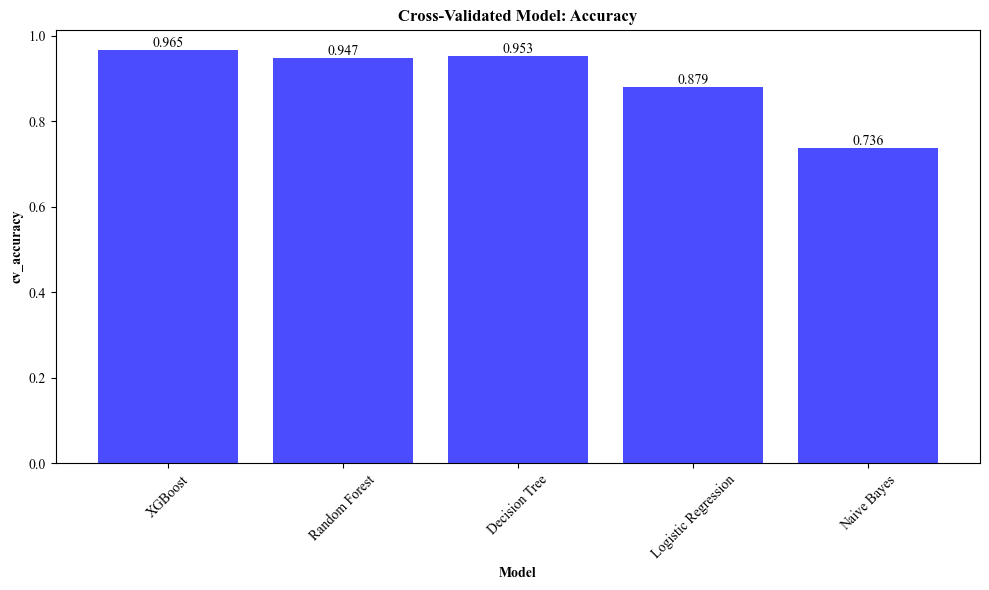

Plot saved to ml_plots/ML_plot_cv_accuracy.png


In [71]:
plot_model_performance(df_data, 'cv_accuracy', 'Model', 'Cross-Validated Model: Accuracy', 'blue', ml_plots_dir)

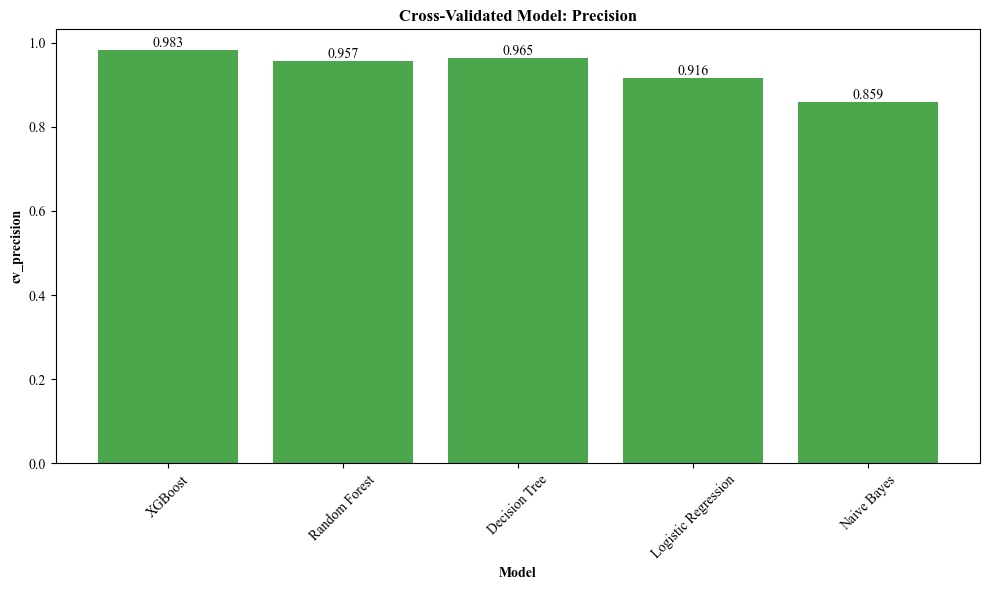

Plot saved to ml_plots/ML_plot_cv_precision.png


In [72]:
plot_model_performance(df_data, 'cv_precision', 'Model', 'Cross-Validated Model: Precision', 'green', ml_plots_dir)

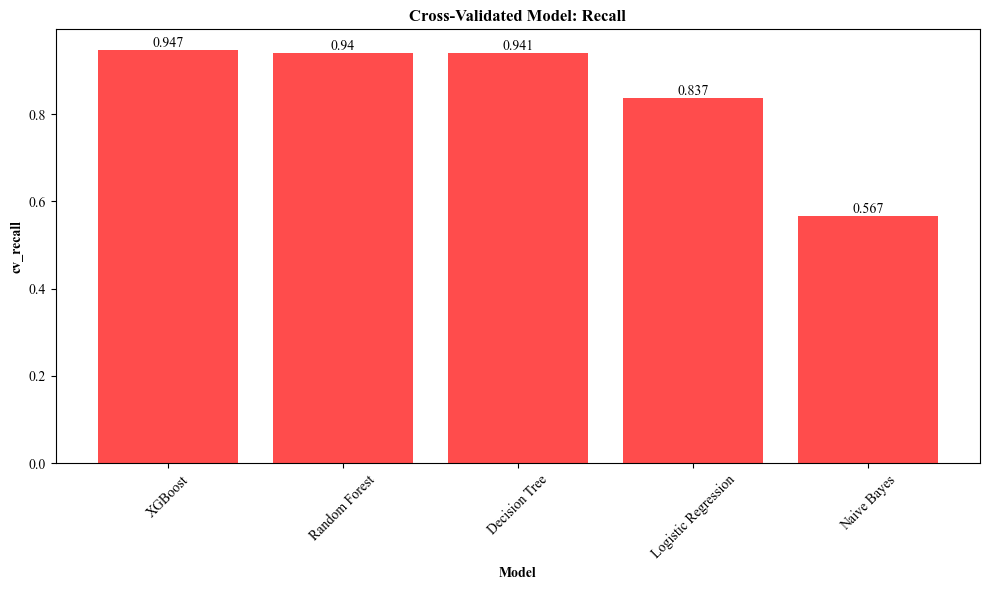

Plot saved to ml_plots/ML_plot_cv_recall.png


In [73]:
plot_model_performance(df_data, 'cv_recall', 'Model', 'Cross-Validated Model: Recall', 'red', ml_plots_dir)

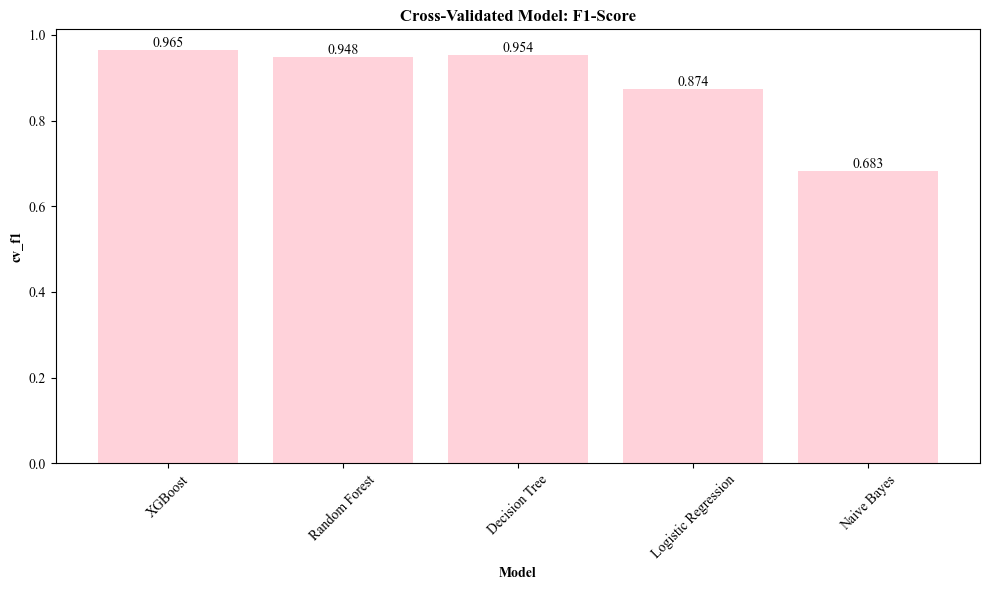

Plot saved to ml_plots/ML_plot_cv_f1.png


In [74]:
plot_model_performance(df_data, 'cv_f1', 'Model', 'Cross-Validated Model: F1-Score', 'pink', ml_plots_dir)